<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n60.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.088399,89.596932,85.931849,58.736673,0.869704,287.223557,286.546449,0.677108
1,0.0,1.0,88.966822,56.770127,29.049687,35.478372,0.130690,220.395698,220.185444,0.210254
2,0.0,2.0,72.993439,96.559308,95.990992,30.575034,0.329857,306.448630,306.249305,0.199325
3,0.0,3.0,84.008919,86.202599,60.315230,47.229199,-0.282283,287.473664,287.795795,-0.322131
4,0.0,4.0,90.414142,22.311642,73.327501,69.232277,0.103897,265.389459,265.589264,-0.199806
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.821489,25.031629,39.082269,99.324614,-0.789071,257.470928,258.168715,-0.697787
59996,999.0,56.0,98.102559,76.018292,62.526074,34.017915,-0.057724,280.607115,280.373897,0.233218
59997,999.0,57.0,42.123600,53.917874,54.433083,72.517494,0.392574,233.384625,233.165738,0.218888
59998,999.0,58.0,41.854130,43.595421,98.173948,52.741665,1.369437,247.734602,246.517585,1.217017


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.088399,89.596932,85.931849,58.736673,0.869704,287.223557,286.546449,0.677108
1,0.0,1.0,88.966822,56.770127,29.049687,35.478372,0.130690,220.395698,220.185444,0.210254
2,0.0,2.0,72.993439,96.559308,95.990992,30.575034,0.329857,306.448630,306.249305,0.199325
3,0.0,3.0,84.008919,86.202599,60.315230,47.229199,-0.282283,287.473664,287.795795,-0.322131
4,0.0,4.0,90.414142,22.311642,73.327501,69.232277,0.103897,265.389459,265.589264,-0.199806
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,84.821489,25.031629,39.082269,99.324614,-0.789071,257.470928,258.168715,-0.697787
59996,999.0,56.0,98.102559,76.018292,62.526074,34.017915,-0.057724,280.607115,280.373897,0.233218
59997,999.0,57.0,42.123600,53.917874,54.433083,72.517494,0.392574,233.384625,233.165738,0.218888
59998,999.0,58.0,41.854130,43.595421,98.173948,52.741665,1.369437,247.734602,246.517585,1.217017


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.088399  89.596932  85.931849  58.736673  0.869704  287.223557   
      1.0    88.966822  56.770127  29.049687  35.478372  0.130690  220.395698   
      2.0    72.993439  96.559308  95.990992  30.575034  0.329857  306.448630   
      3.0    84.008919  86.202599  60.315230  47.229199 -0.282283  287.473664   
      4.0    90.414142  22.311642  73.327501  69.232277  0.103897  265.389459   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   84.821489  25.031629  39.082269  99.324614 -0.789071  257.470928   
      56.0   98.102559  76.018292  62.526074  34.017915 -0.057724  280.607115   
      57.0   42.123600  53.917874  54.433083  72.517494  0.392574  233.384625   
      58.0   41.854130  43.595421  98.173948  52.741665  1.369437  247.734602   
      59.0   67.014400  56.407526  59.700753  61.974868 -1.002097  254.095450   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    286.546449  0.677108  
      1.0    220.185444  0.210254  
      2.0    306.249305  0.199325  
      3.0    287.795795 -0.322131  
      4.0    265.589264 -0.199806  
...                 ...       ...  
999.0 55.0   258.168715 -0.697787  
      56.0   280.373897  0.233218  
      57.0   233.165738  0.218888  
      58.0   246.517585  1.217017  
      59.0   255.072622 -0.977171  

[60000 rows x 8 columns]

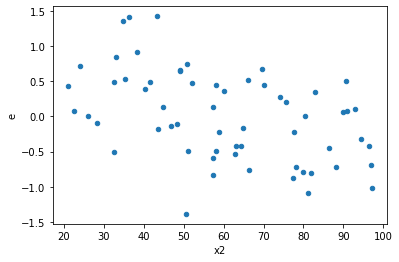

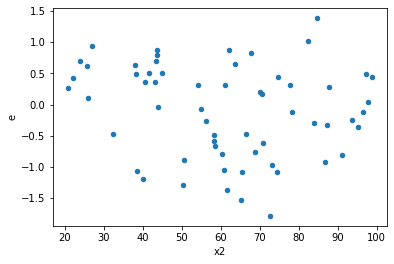

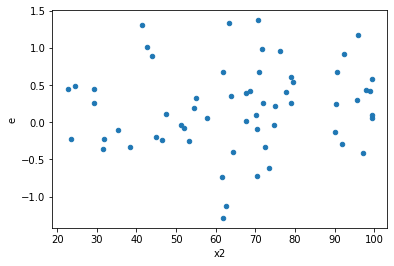

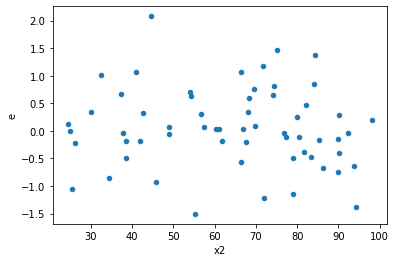

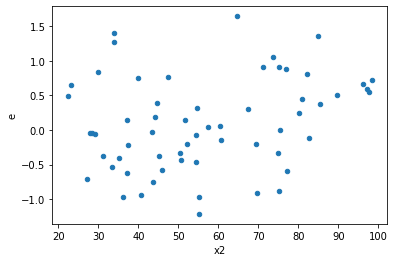

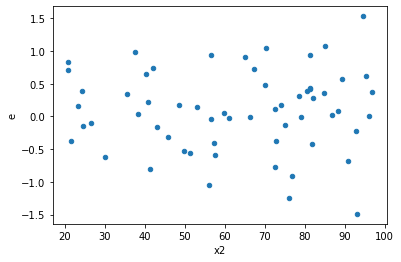

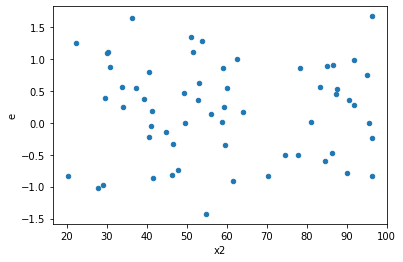

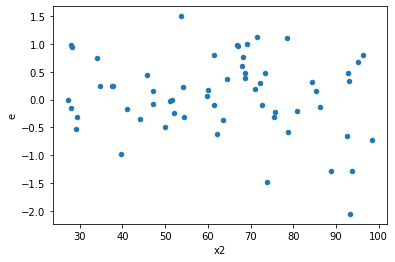

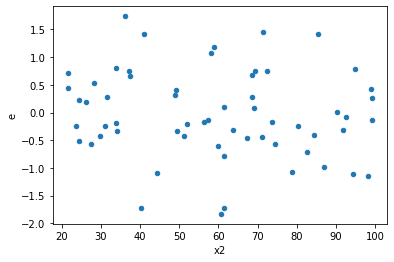

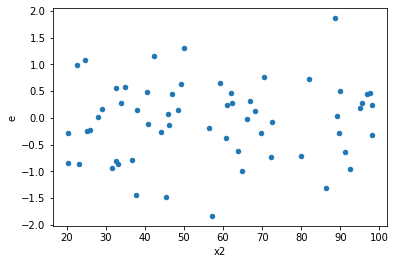

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,23.0,11.81497078363564,10.59351736456187,0.4074127856426083,0.46058771150269,1.130518549574259,0.7705921569047534,0.6147039215476233,0.3852960784523767,Reject005=1 : Homoscedasticity
6.0,17.0,35.0,9.521742998377277,24.594280231591924,0.5601025293163104,0.7026937209026264,1.254580517178471,0.5537972377568283,0.7231013811215858,0.27689861887841416,Reject005=1 : Homoscedasticity
7.0,32.0,20.0,9.89121859584418,9.344579021654383,0.3091005811201306,0.4672289510827191,1.5115757770158724,0.3346873795479304,0.8326563102260348,0.1673436897739652,Reject005=1 : Homoscedasticity
10.0,21.0,31.0,3.478490356302813,14.195360347401392,0.16564239791918156,0.4579148499161739,2.764478513161798,0.010045060179598053,0.994977469910201,0.005022530089799027,Reject005=0 : Heteroscedasticity
11.0,28.0,24.0,14.372678760653484,13.287734111818686,0.5133099557376244,0.5536555879924453,1.078598966966936,0.8570440023716399,0.57147799881418,0.42852200118581996,Reject005=1 : Homoscedasticity
15.0,26.0,26.0,9.070605134251808,11.127485330869057,0.3488694282404542,0.42798020503342526,1.2267632827329453,0.6061071736543826,0.6969464131728087,0.3030535868271913,Reject005=1 : Homoscedasticity
17.0,31.0,21.0,9.931145507412234,8.452147822279922,0.3203595324971688,0.40248322963237726,1.2563485359560331,0.5926573960861257,0.7036713019569372,0.29632869804306283,Reject005=1 : Homoscedasticity
19.0,36.0,16.0,14.579882936563456,10.369624393057785,0.4049967482378738,0.6481015245661116,1.600263526524541,0.31505957476408697,0.8424702126179565,0.15752978738204348,Reject005=1 : Homoscedasticity
20.0,36.0,16.0,16.55895859952741,10.53809405954387,0.4599710722090948,0.6586308787214918,1.4318963050400044,0.4467005035015177,0.7766497482492412,0.22335025175075884,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,23.0,11.81497078363564,10.59351736456187,0.4074127856426083,0.46058771150269,1.130518549574259,0.7705921569047534,Reject005=1 : Homoscedasticity
1.0,30.0,22.0,19.912336939740484,5.278515341533074,0.6637445646580161,0.23993251552423064,0.361483209505229,0.010124679150769915,Reject005=0 : Heteroscedasticity
2.0,21.0,31.0,10.305826043984403,11.897476922199761,0.49075362114211446,0.38378957813547615,0.7820412557370346,0.5633345826289539,Reject005=1 : Homoscedasticity
3.0,34.0,18.0,16.742096381929546,6.6284875634065035,0.49241459946851607,0.3682493090781391,0.7478440108713392,0.4534475109387317,Reject005=1 : Homoscedasticity
4.0,24.0,28.0,16.113283074834587,12.479743185203903,0.6713867947847745,0.4457051137572822,0.663857432436039,0.31131705247533326,Reject005=1 : Homoscedasticity
5.0,26.0,26.0,12.082445337127252,9.2250478853284,0.46470943604335585,0.35480953405109233,0.7635083485113261,0.4962913350634538,Reject005=1 : Homoscedasticity
6.0,17.0,35.0,9.521742998377277,24.594280231591924,0.5601025293163104,0.7026937209026264,1.254580517178471,0.5537972377568283,Reject005=1 : Homoscedasticity
7.0,32.0,20.0,9.89121859584418,9.344579021654383,0.3091005811201306,0.4672289510827191,1.5115757770158724,0.3346873795479304,Reject005=1 : Homoscedasticity
8.0,33.0,19.0,20.51656693416702,5.540054125166268,0.6217141495202128,0.2915817960613825,0.4689965578013643,0.05490131681446966,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      937
Reject005=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64